In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1) Sample project for Color detection

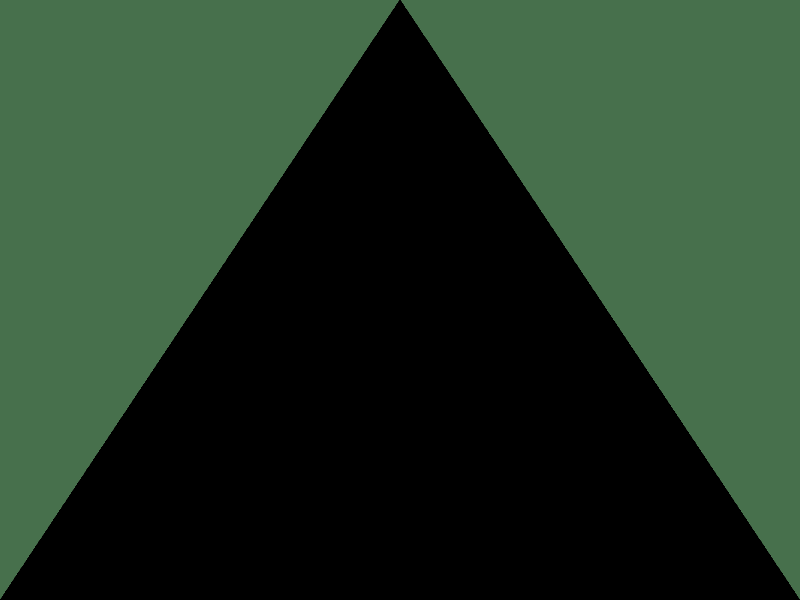

Detected Color: Black (R=0, G=0, B=0)


In [ ]:
import cv2
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow

color_data = pd.read_csv("/content/drive/MyDrive/IVA_assignment/colors.csv")
image = cv2.imread("/content/drive/MyDrive/IVA_assignment/image.png")
image = cv2.resize(image, (800, 600))

def get_color_name(R, G, B):
    min_dist = float("inf")
    color_name = ""
    for _, row in color_data.iterrows():
        dist = np.sqrt((R - row["R"])**2 + (G - row["G"])**2 + (B - row["B"])**2)
        if dist < min_dist:
            min_dist = dist
            color_name = row["Color Name"]
    return color_name

def manual_color_detection(x, y):
    B, G, R = image[y, x]
    color_name = get_color_name(R, G, B)
    print(f"Detected Color: {color_name} (R={R}, G={G}, B={B})")

cv2_imshow(image)
x, y = 400, 300
manual_color_detection(x, y)

### 2) Data structures for Image Analysis: Write a program that computes the T-pyramid of an image

Level 0: Image size 2000x1732


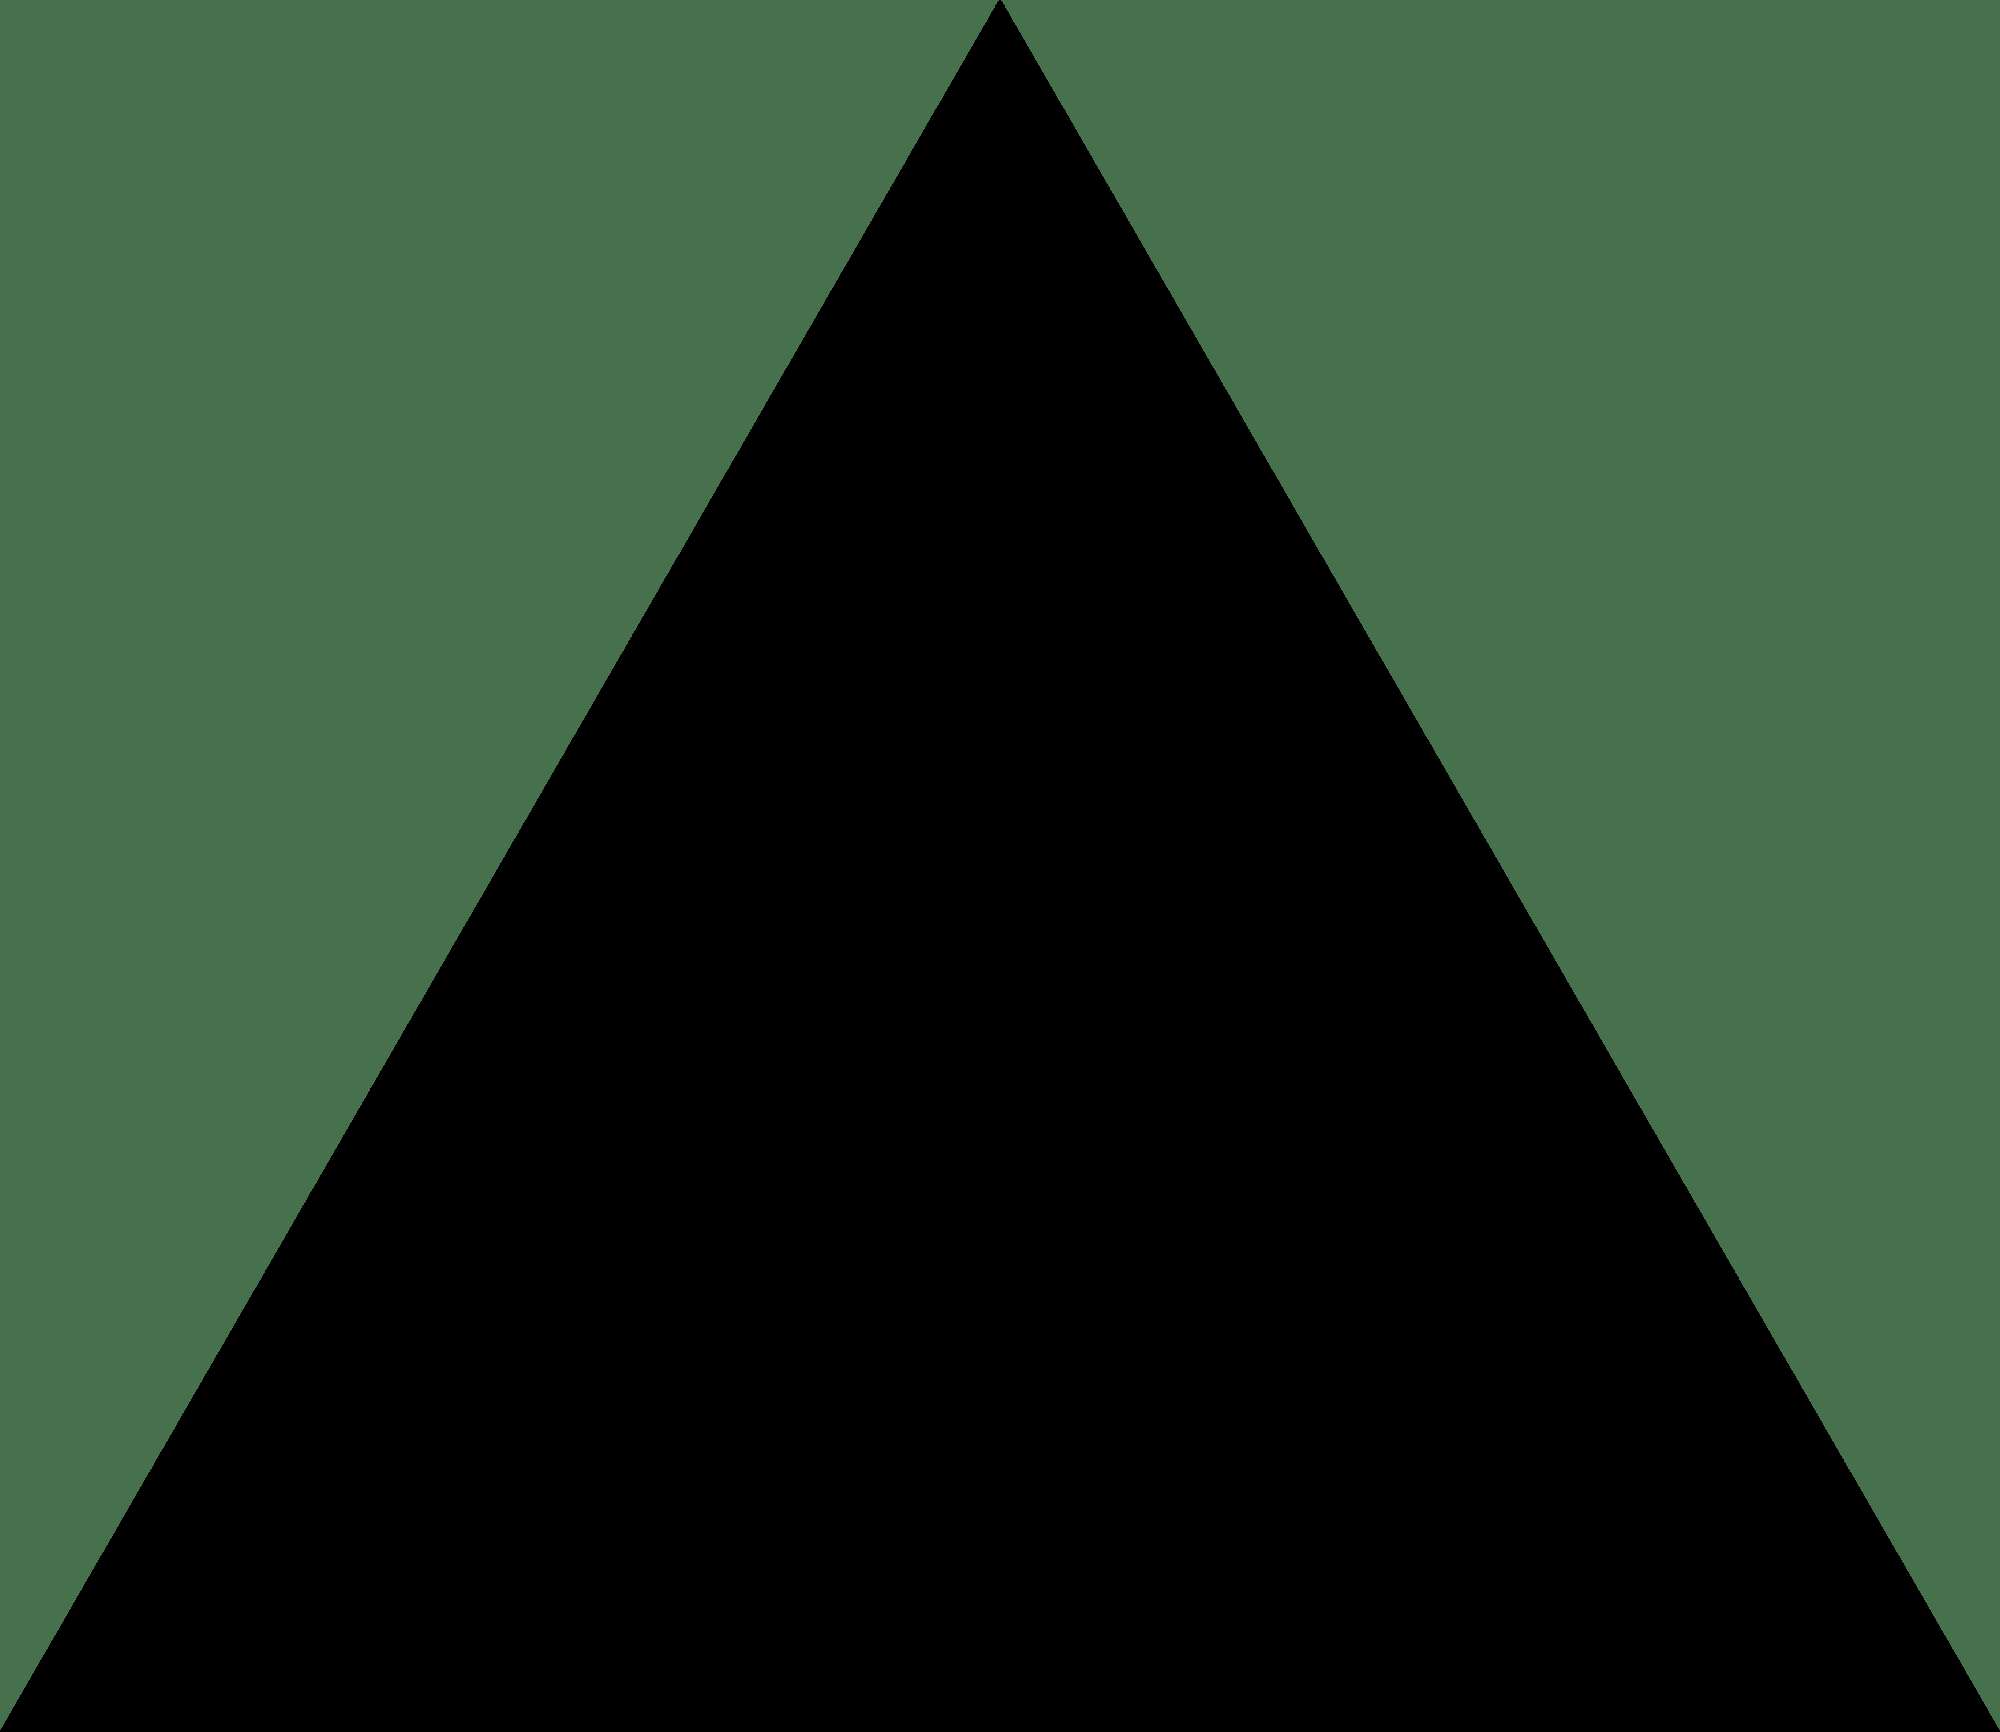

Level 1: Image size 1000x866


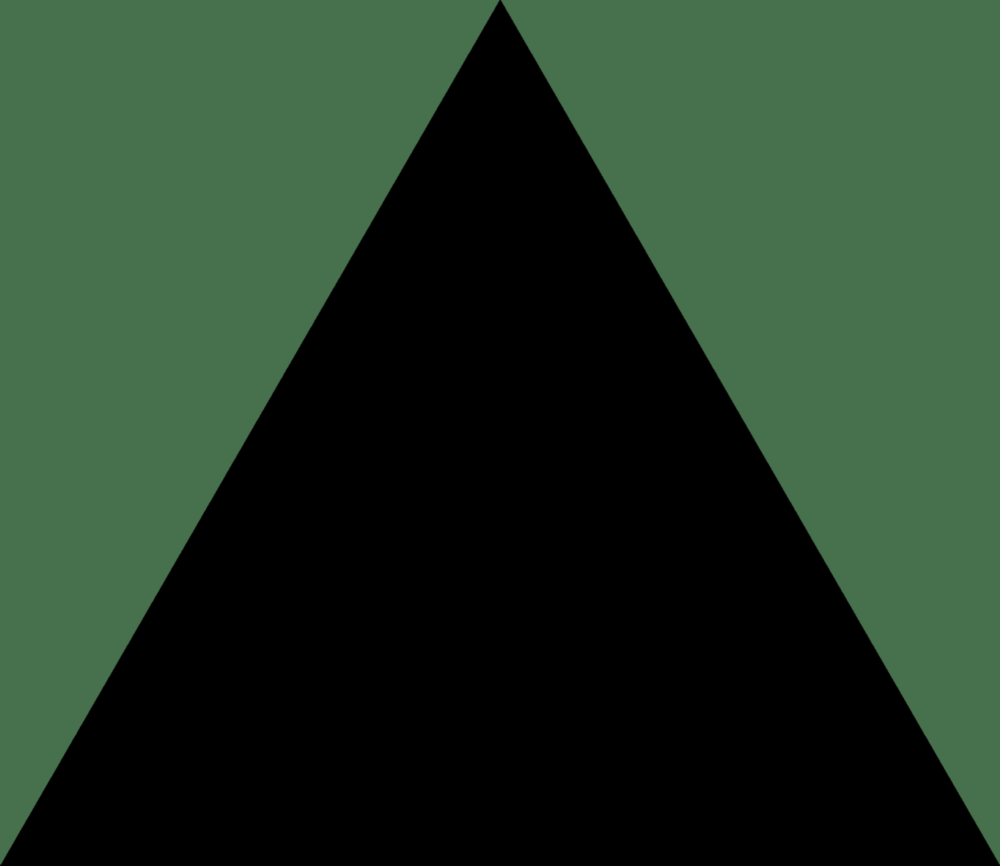

Level 2: Image size 500x433


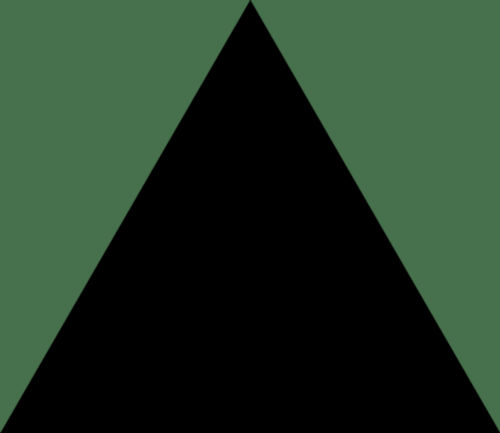

Level 3: Image size 250x217


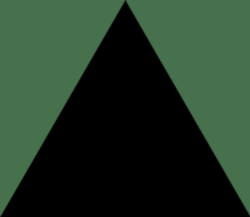

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/IVA_assignment/image.png")

def compute_t_pyramid(image, levels=4):
    pyramid = [image]
    for i in range(1, levels):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

t_pyramid = compute_t_pyramid(image, levels=4)

for i, img in enumerate(t_pyramid):
    print(f"Level {i}: Image size {img.shape[1]}x{img.shape[0]}")
    cv2_imshow(img)


### 3) Sample project for Image Smoothing

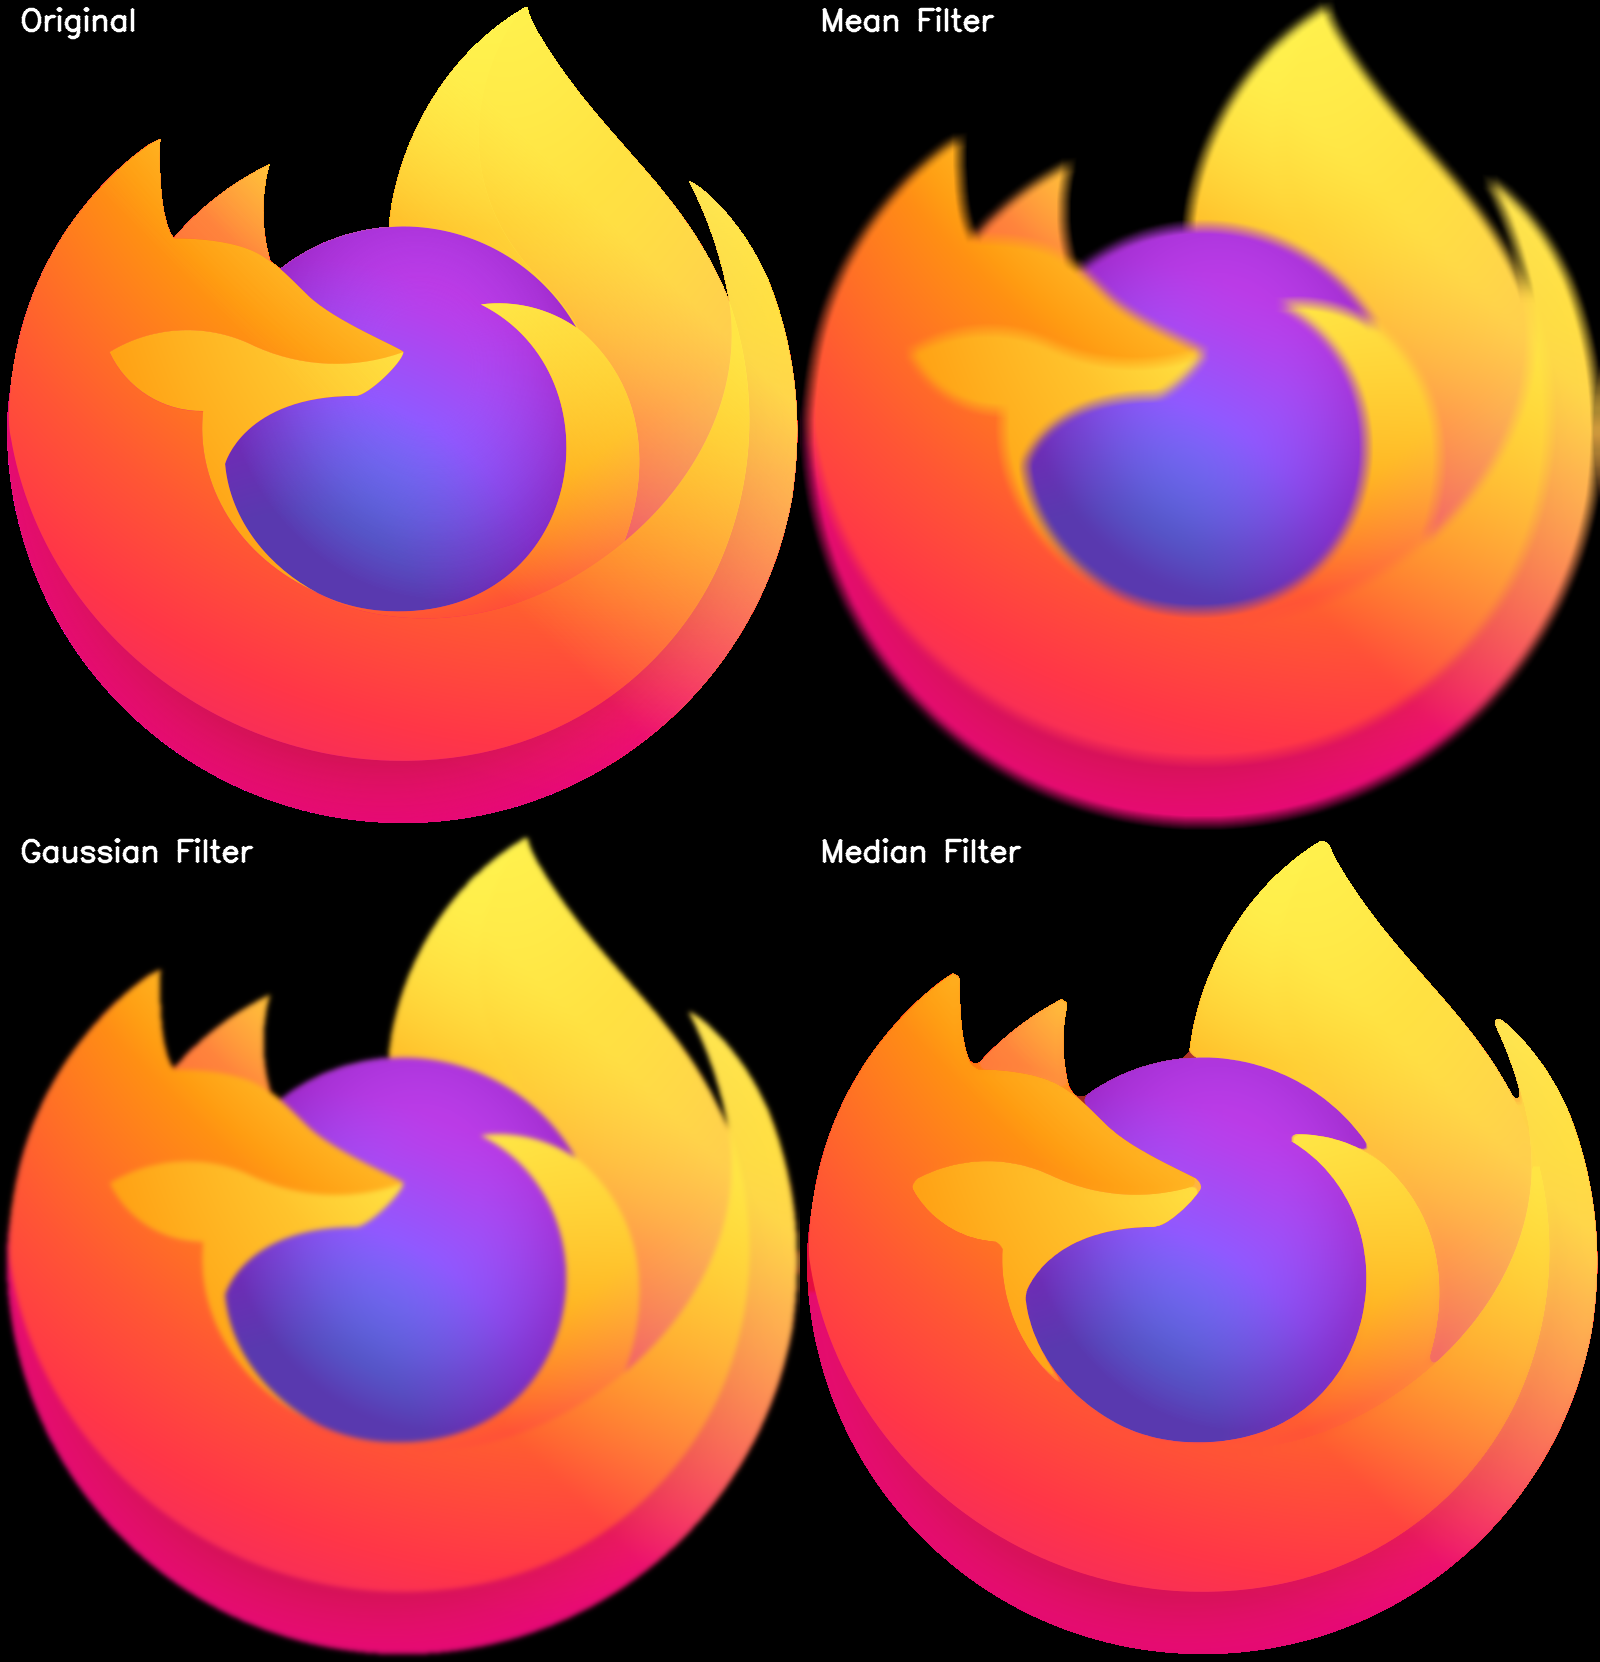

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/IVA_assignment/Firefox.png")

mean_blur = cv2.blur(image, (15, 15))
gaussian_blur = cv2.GaussianBlur(image, (15, 15), 0)
median_blur = cv2.medianBlur(image, 15)

def resize_to_match(img, reference):
    return cv2.resize(img, (reference.shape[1], reference.shape[0]))

mean_blur = resize_to_match(mean_blur, image)
gaussian_blur = resize_to_match(gaussian_blur, image)
median_blur = resize_to_match(median_blur, image)

def add_label(img, label):
    labeled_img = img.copy()
    cv2.putText(labeled_img, label, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return labeled_img

image_labeled = add_label(image, "Original")
mean_blur_labeled = add_label(mean_blur, "Mean Filter")
gaussian_blur_labeled = add_label(gaussian_blur, "Gaussian Filter")
median_blur_labeled = add_label(median_blur, "Median Filter")

top_row = np.hstack((image_labeled, mean_blur_labeled))
bottom_row = np.hstack((gaussian_blur_labeled, median_blur_labeled))
grid = np.vstack((top_row, bottom_row))

cv2_imshow(grid)


### 4) Sample project for Edge detection using Sobel ,Canny edge.

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/IVA_assignment/Firefox.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.bitwise_or(np.uint8(np.absolute(sobel_x)), np.uint8(np.absolute(sobel_y)))
canny_edges = cv2.Canny(gray, 50, 150)

def add_label(img, label):
    labeled_img = cv2.putText(img.copy(), label, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return labeled_img

image = add_label(image, "Original")
gray = add_label(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR), "Grayscale")
sobel_x = add_label(cv2.cvtColor(np.uint8(np.absolute(sobel_x)), cv2.COLOR_GRAY2BGR), "Sobel X")
sobel_y = add_label(cv2.cvtColor(np.uint8(np.absolute(sobel_y)), cv2.COLOR_GRAY2BGR), "Sobel Y")
sobel_combined = add_label(cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2BGR), "Sobel Combined")
canny_edges = add_label(cv2.cvtColor(canny_edges, cv2.COLOR_GRAY2BGR), "Canny Edges")

row1 = np.hstack((image, gray, sobel_x))
row2 = np.hstack((sobel_y, sobel_combined, canny_edges))
grid = np.vstack((row1, row2))

cv2_imshow(grid)


Output hidden; open in https://colab.research.google.com to view.

### 5) Object Detection with OpenCV
- Detect simple objects like faces, eyes, or hands using
OpenCV and Haar cascades.
- Libraries: OpenCV, NumPy

Number of faces detected: 5
Detected Objects


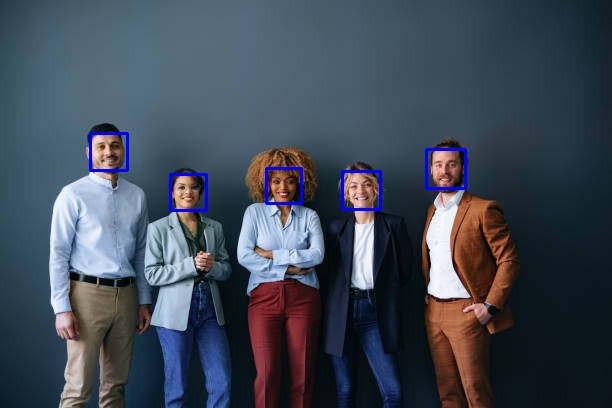

In [3]:
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

image = cv2.imread("/content/drive/MyDrive/IVA_assignment/5ppl.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

print(f"Number of faces detected: {len(faces)}")

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

print("Detected Objects")
cv2_imshow(image)